In [1]:
from nariflow import start_initializer

In [11]:
start_initializer().initializer('tape')

In [96]:
from nariflow import Variable
from nariflow import optimizer
from nariflow import GradientTape
#from nariflow import calc_gradient
from nariflow import layer
from nariflow.models import Model
from nariflow import functions as f
from nariflow.core import elementary_function as ef
from nariflow.core import shape_function as sf
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

import time

import os
import urllib

import datetime



In [166]:

def prepare():
    num_data = 1000
    dtype = np.float64

    x = np.linspace(0, 2 * np.pi, num_data)
    noise_range = (-0.05, 0.05)
    noise = np.random.uniform(noise_range[0], noise_range[1], size=x.shape)
    y = np.sin(x) + noise
    y = y.astype(dtype)
    data = y[:-1][:, np.newaxis]
    label = y[1:][:, np.newaxis]
    
    return data,label

In [167]:
class SimpleRNN(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = layer.RNN(hidden_size)
        self.l2 = layer.Linear(out_size, initializer_func='he_uniform')
        
    def forward(self, x):
        y = self.l1(x)
        y = y[-2:-1]
        y = self.l2(y)
        return y
    

In [186]:
train_set = prepare()

In [218]:
model = SimpleRNN(100, 1)

optimizers = optimizer.SGD()

optimizers.setup(model)

In [219]:
for epoch in range(100):
    
    for teps in range(len(train_set[0]) - step - 1):
        with GradientTape() as tape:
            y_pred = model(train_set[0][teps  : teps + step])
            loss = f.loss.mean_squared_error(y_pred, train_set[1][(teps + 1) + step])
        
        tape.CalcGradient()
        optimizers.update()
    if epoch % 10 == 0:
        print(loss.data)

0.0054205528539780674
0.00014511136479305664
9.233092203563794e-05
5.53430284073198e-05
2.9972938285111977e-05
1.3459877570839444e-05
3.944264110786258e-06
1.5774360529778188e-07
1.2667534172214512e-06
6.8273811004295724e-06


In [220]:
y_pred = list()
for teps in range(int(len(train_set[0]) - step)):
    y_pred.append(model(train_set[0][teps  : teps + step]).data)

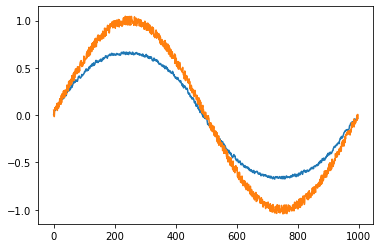

In [222]:
plt.plot(np.squeeze(np.squeeze(y_pred)))
plt.plot(np.squeeze(train_set[1]))